In [3]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [4]:
west = pd.read_csv('./data/West_region.csv')

In [5]:
west.index = west['ValidStart']

## son's model

In [6]:
def df_to_X_y(df, windowsize=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 5
X, y = df_to_X_y(west['DSCI'], WINDOW_SIZE)
X.shape, y.shape

((1089, 5, 1), (1089,))

In [7]:
X_train, y_train = X[:700], y[:700]
X_val, y_val = X[700:800], y[700:800]
X_test, y_test = X[800:], y[800:]

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [10]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
18/22 [=======================>......] - ETA: 0s - loss: 21953.6016 - root_mean_squared_error: 148.1675 

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 5s 172ms/step - loss: 21540.2227 - root_mean_squared_error: 146.7659 - val_loss: 11423.3477 - val_root_mean_squared_error: 106.8801
Epoch 2/10
22/22 [==============================] - ETA: 0s - loss: 17743.0430 - root_mean_squared_error: 133.2030

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 3s 152ms/step - loss: 17743.0430 - root_mean_squared_error: 133.2030 - val_loss: 7951.2671 - val_root_mean_squared_error: 89.1699
Epoch 3/10
 1/22 [>.............................] - ETA: 0s - loss: 16173.3828 - root_mean_squared_error: 127.1746

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 3s 141ms/step - loss: 13326.7441 - root_mean_squared_error: 115.4415 - val_loss: 4480.0366 - val_root_mean_squared_error: 66.9331
Epoch 4/10
18/22 [=======================>......] - ETA: 0s - loss: 9532.1846 - root_mean_squared_error: 97.6329  

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 3s 138ms/step - loss: 9160.4111 - root_mean_squared_error: 95.7100 - val_loss: 2015.4703 - val_root_mean_squared_error: 44.8940
Epoch 5/10
14/22 [==================>...........] - ETA: 0s - loss: 6738.5845 - root_mean_squared_error: 82.0889  

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 3s 131ms/step - loss: 6253.6191 - root_mean_squared_error: 79.0798 - val_loss: 954.1096 - val_root_mean_squared_error: 30.8887
Epoch 6/10
 1/22 [>.............................] - ETA: 0s - loss: 4799.0479 - root_mean_squared_error: 69.2752

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 3s 130ms/step - loss: 3916.2739 - root_mean_squared_error: 62.5801 - val_loss: 238.8977 - val_root_mean_squared_error: 15.4563
Epoch 7/10
21/22 [===========================>..] - ETA: 0s - loss: 2214.8606 - root_mean_squared_error: 47.0623

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 2s 119ms/step - loss: 2206.7231 - root_mean_squared_error: 46.9758 - val_loss: 55.5622 - val_root_mean_squared_error: 7.4540
Epoch 8/10
21/22 [===========================>..] - ETA: 0s - loss: 1297.5973 - root_mean_squared_error: 36.0222

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


22/22 [==============================] - 3s 140ms/step - loss: 1288.6139 - root_mean_squared_error: 35.8973 - val_loss: 50.5679 - val_root_mean_squared_error: 7.1111
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 829.5204 - root_mean_squared_error: 28.8014 - val_loss: 53.7020 - val_root_mean_squared_error: 7.3282
Epoch 10/10
22/22 [==============================] - 0s 3ms/step - loss: 576.9783 - root_mean_squared_error: 24.0204 - val_loss: 54.5499 - val_root_mean_squared_error: 7.3858


In [11]:
from tensorflow.keras.models import load_model
model1 = load_model("model1/")

In [12]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,176.711304,260.636364
1,176.711731,263.454545
2,176.712677,267.000000
3,176.713684,268.818182
4,176.714172,272.000000
...,...,...
695,99.973274,98.181818
696,96.890312,99.363636
697,98.578789,99.090909
698,97.792801,98.818182


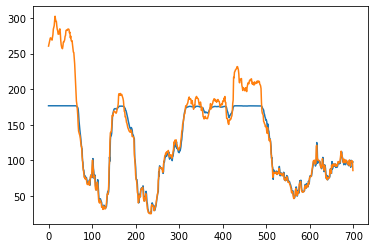

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [14]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals': y_val})
val_results

,Val Predictions,Actuals
0,81.212402,83.545455
1,83.649681,78.636364
2,77.778511,93.090909
3,99.545975,91.454545
4,89.509056,91.909091
...,...,...
95,96.012718,95.000000
96,94.622742,98.454545
97,98.580040,110.727273
98,112.837463,108.636364


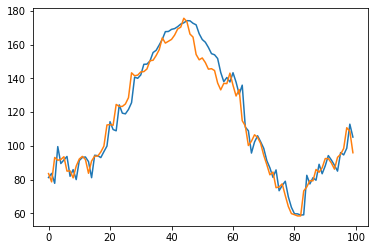

In [15]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [16]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':val_predictions, 'Actuals': y_val})
test_results

,Test Predictions,Actuals
0,81.212402,83.545455
1,83.649681,78.636364
2,77.778511,93.090909
3,99.545975,91.454545
4,89.509056,91.909091
...,...,...
95,96.012718,95.000000
96,94.622742,98.454545
97,98.580040,110.727273
98,112.837463,108.636364


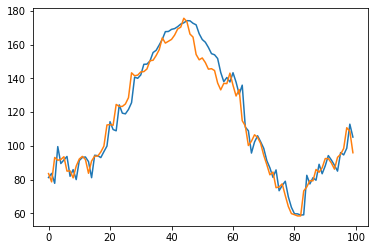

In [17]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

In [32]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt

In [33]:
west.head()

,ValidStart,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_population,total_area,Region
ValidStart,,,,,,,,,,,,,,,,,
2000-12-26,2000-12-26,1434812.58,101825.23,7758.44,0.00,0.0,0.0,68357640.86,899817.04,130497.41,0.00,0.0,0.0,270.909091,69387955.31,1544396.25,west
2001-01-02,2001-01-02,1385883.61,150754.21,7758.44,0.00,0.0,0.0,47544376.73,21713081.18,130497.41,0.00,0.0,0.0,270.727273,69387955.32,1544396.26,west
2001-01-09,2001-01-09,1335052.37,201462.03,7631.41,250.43,0.0,0.0,43966433.52,25275881.78,113027.16,32612.88,0.0,0.0,265.454545,69387955.34,1544396.24,west
2001-01-16,2001-01-16,1393073.96,139449.02,11622.83,250.43,0.0,0.0,63959056.64,5098179.64,298106.16,32612.88,0.0,0.0,262.090909,69387955.32,1544396.24,west
2001-01-23,2001-01-23,1212072.00,319908.04,12165.78,250.43,0.0,0.0,55062839.85,13926646.57,365856.02,32612.88,0.0,0.0,259.363636,69387955.32,1544396.25,west


In [34]:
west.drop(['ValidStart','Region'],axis=1,inplace=True)
features = [col for col in west.columns if not col == 'DSCI']

X = west[features]

y = west[['DSCI']].values

In [35]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

X_train.head()

,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,total_population,total_area
ValidStart,,,,,,,,,,,,,,
2000-12-26,1434812.58,101825.23,7758.44,0.00,0.0,0.0,68357640.86,899817.04,130497.41,0.00,0.0,0.0,69387955.31,1544396.25
2001-01-02,1385883.61,150754.21,7758.44,0.00,0.0,0.0,47544376.73,21713081.18,130497.41,0.00,0.0,0.0,69387955.32,1544396.26
2001-01-09,1335052.37,201462.03,7631.41,250.43,0.0,0.0,43966433.52,25275881.78,113027.16,32612.88,0.0,0.0,69387955.34,1544396.24
2001-01-16,1393073.96,139449.02,11622.83,250.43,0.0,0.0,63959056.64,5098179.64,298106.16,32612.88,0.0,0.0,69387955.32,1544396.24
2001-01-23,1212072.00,319908.04,12165.78,250.43,0.0,0.0,55062839.85,13926646.57,365856.02,32612.88,0.0,0.0,69387955.32,1544396.25


In [36]:
# Scale

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [37]:
# Create training sequences
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length = 3, batch_size = 64)

In [38]:
batch_x, batch_y = train_sequences[0]

In [39]:
batch_x.shape

(64, 3, 14)

In [40]:
batch_y.shape

(64, 1)

In [41]:
# Create test sequences

test_sequences = TimeseriesGenerator(X_test_sc, y_test, length = 3, batch_size = 64)

In [43]:
# Design RNN

input_shape = batch_x.shape[1:]

model = Sequential()
model.add(GRU(8, input_shape = input_shape, return_sequences=True)) # True when your next layer is also an RNN layer
model.add(GRU(8, return_sequences=False)) # False because next layer is NOT an RNN layer
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'bce',
    optimizer = Adam(lr=0.0005),
    metrics = ['acc'])

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [44]:
history = model.fit(train_sequences,
                    validation_data = test_sequences,
                    epochs = 50)

Epoch 1/50
13/13 [==============================] - 3s 49ms/step - loss: 2.5290 - acc: 0.0000e+00 - val_loss: 0.0240 - val_acc: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: -1.2668 - acc: 0.0000e+00 - val_loss: -4.1710 - val_acc: 0.0000e+00
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: -5.1195 - acc: 0.0000e+00 - val_loss: -8.6094 - val_acc: 0.0000e+00
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: -8.8191 - acc: 0.0000e+00 - val_loss: -13.1022 - val_acc: 0.0000e+00
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: -12.5125 - acc: 0.0000e+00 - val_loss: -18.0325 - val_acc: 0.0000e+00
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: -16.4556 - acc: 0.0000e+00 - val_loss: -23.2620 - val_acc: 0.0000e+00
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: -20.3143 - acc: 0.0000e+00 - val_loss: -29.3722 - val_acc: 0.0000e+00
Epoch 8/50
13/

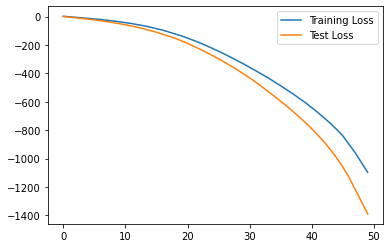

In [45]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();

In [8]:
west.head()

,ValidStart,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_population,total_area,Region
ValidStart,,,,,,,,,,,,,,,,,
2000-12-26,2000-12-26,1434812.58,101825.23,7758.44,0.00,0.0,0.0,68357640.86,899817.04,130497.41,0.00,0.0,0.0,270.909091,69387955.31,1544396.25,west
2001-01-02,2001-01-02,1385883.61,150754.21,7758.44,0.00,0.0,0.0,47544376.73,21713081.18,130497.41,0.00,0.0,0.0,270.727273,69387955.32,1544396.26,west
2001-01-09,2001-01-09,1335052.37,201462.03,7631.41,250.43,0.0,0.0,43966433.52,25275881.78,113027.16,32612.88,0.0,0.0,265.454545,69387955.34,1544396.24,west
2001-01-16,2001-01-16,1393073.96,139449.02,11622.83,250.43,0.0,0.0,63959056.64,5098179.64,298106.16,32612.88,0.0,0.0,262.090909,69387955.32,1544396.24,west
2001-01-23,2001-01-23,1212072.00,319908.04,12165.78,250.43,0.0,0.0,55062839.85,13926646.57,365856.02,32612.88,0.0,0.0,259.363636,69387955.32,1544396.25,west


In [10]:
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

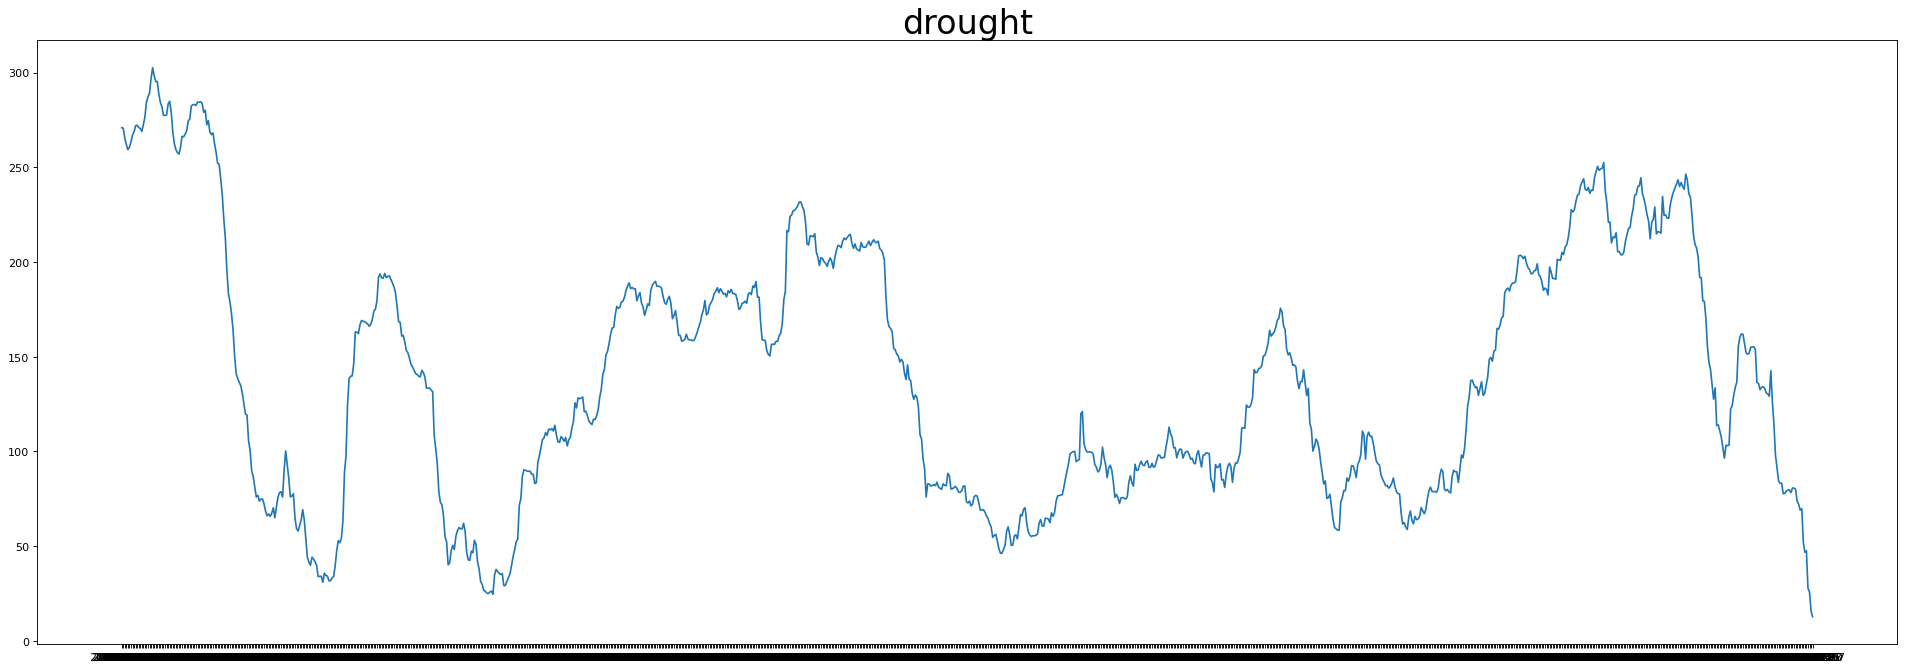

In [24]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('drought', fontsize=30)

plt.plot(west.DSCI);

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
y = west['DSCI']

In [17]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  warnings.warn('No frequency information was'


In [18]:
ARMAmodel = ARMAmodel.fit()


In [19]:
y_pred = ARMAmodel.get_forecast(len(west.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = west.index
y_pred_out = y_pred_df["Predictions"] 

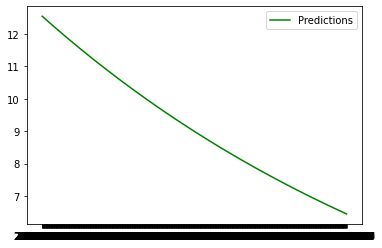

In [20]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(west["DSCI"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  144.7916505142193
